# Lecture9 動的システム

## ステップ応答（時間応答）
1次系のステップ応答，インパルス応答  
2次系のインパルス応答  
scipy.integrate.odeint https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [1]:
# -*- coding: utf-8 -*-
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def dFunc_1(x, time, a, u):
    dx = -a*x + u
    return dx

time = np.linspace(0,3,100) # time interval, 100 division
a = 2.0

#### 1次系のステップ応答
1次のODE (Ordinary Differential Equation)

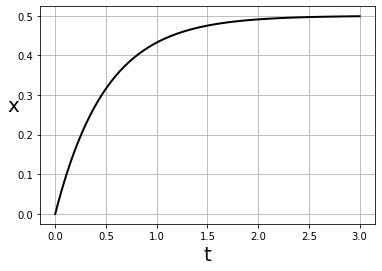

In [3]:
x0 = 0.0 # Initial value
u = 1.0  # Step input
sol_1 = odeint(dFunc_1, x0 ,time, args=(a,u))
plt.plot(time, sol_1, '-k', linewidth=2)
plt.xlabel('t', fontsize=20)
plt.ylabel('x', fontsize=20, rotation='horizontal')
plt.grid()


#### 1次系のインパルス応答


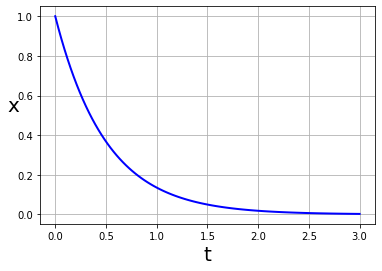

In [4]:
x0 = 1.0 # Initial value
u = 0.0  # zero input
sol_2 = odeint(dFunc_1, x0 ,time, args=(a,u))
plt.plot(time, sol_2, '-b', linewidth=2)
plt.xlabel('t', fontsize=20)
plt.ylabel('x', fontsize=20, rotation='horizontal')
plt.grid()


#### 2次系のステップ応答
質量(mass)，ばね定数（spring）の係数は一定として，ダンパ係数を変えてシミュレーションを実施

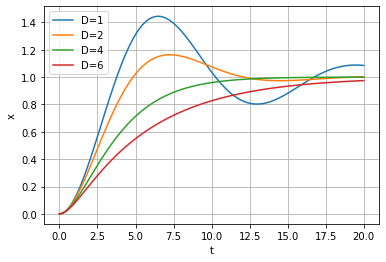

In [5]:
def dFunc_2(x, time, mass, damper, spring, u):
    dx1 = x[1]
    dx0 = (-1/mass)*(damper*x[1] + spring*x[0] - u) 
    return [dx1, dx0]

time = np.linspace(0,20,100)
u = 1.0  # input
x0 = [0.0, 0.0]

mass, damper, spring = 4.0, 0.4, 1.0 # damper; changeable

sol_1 = odeint(dFunc_2, x0, time, args=(mass, 1.0, spring, u))
sol_2 = odeint(dFunc_2, x0, time, args=(mass, 2.0, spring, u))
sol_3 = odeint(dFunc_2, x0, time, args=(mass, 4.0, spring, u))
sol_4 = odeint(dFunc_2, x0, time, args=(mass, 6.0, spring, u))

plt.plot(time, sol_1[:,[0]], label='D=1')
plt.plot(time, sol_2[:,[0]], label='D=2')
plt.plot(time, sol_3[:,[0]], label='D=4')
plt.plot(time, sol_4[:,[0]], label='D=6')

plt.xlabel('t')
#plt.ylabel('x', rotation='horizontal')
plt.ylabel('x')
plt.legend()
plt.grid()


## 伝達関数による記述

'control'パッケージを利用します。

In [7]:
from control.matlab import *

伝達関数モデルの記述

In [8]:
Np = [0, 1]      # 伝達関数の分子多項式の係数 (0*s + 1)
Dp = [1, 2, 3]   # 伝達関数の分母多項式の係数 (1*s^2 + 2*s + 3)
P = tf(Np, Dp)
print('P(s)=', P)

P(s)= 
      1
-------------
s^2 + 2 s + 3



In [9]:
P = tf([0, 1], [1, 2, 3])
print('P(s)=', P)

P(s)= 
      1
-------------
s^2 + 2 s + 3



ステップ応答

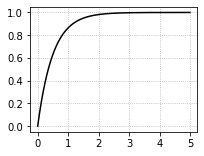

In [30]:
from control.matlab import * #︓伝達関数モデルの定義
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(3, 2.3))
P = tf([0, 1], [0.5, 1])
y, t = step(P, np.arange(0, 5, 0.01))
ax.plot(t, y, color='k')
ax.set_xticks(np.linspace(0, 5, 6))
ax.grid(ls=':')
#stepinfo(P)

時間応答

In [10]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

In [17]:
#便利関数
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args)==3:
        fig_ax.legend(loc=args[2])

def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

一次遅れ系

Text(0.5, 1.0, 'Step Response and T:time constant')

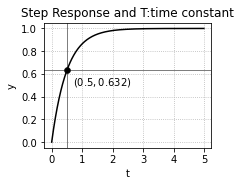

In [26]:
def cross_lines(x, y, **kwargs):
    ax = plt.gca()
    ax.axhline(y, **kwargs)
    ax.axvline(x, **kwargs)
    ax.scatter(T, 0.632, **kwargs)
    
fig, ax = plt.subplots(figsize=(3, 2.3))

(T, K) = (0.5, 1)
P = tf([0, K], [T, 1])
y, t = step(P, np.arange(0, 5, 0.01))
ax.plot(t,y, color='k')

cross_lines(T, 0.632, color='k',lw=0.5)
ax.annotate('$(0.5, 0.632)$', xy=(0.7, 0.5))

ax.set_xticks(np.linspace(0, 5, 6))
plot_set(ax, 't', 'y')
ax.set_title('Step Response and T:time constant')

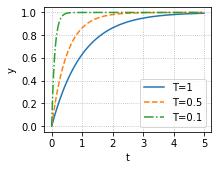

In [18]:
fig, ax = plt.subplots(figsize=(3, 2.3))
LS = linestyle_generator()

K = 1
T = (1, 0.5, 0.1)
for i in range(len(T)):
    y, t = step(tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, ls = next(LS), label='T='+str(T[i]))


ax.set_xticks(np.linspace(0, 5, 6))
ax.set_yticks(np.linspace(0, 1, 6))
plot_set(ax, 't', 'y', 'best')